<a href="https://colab.research.google.com/github/2303a51063/AIMI-2025_B16/blob/main/lab_exam_1063.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

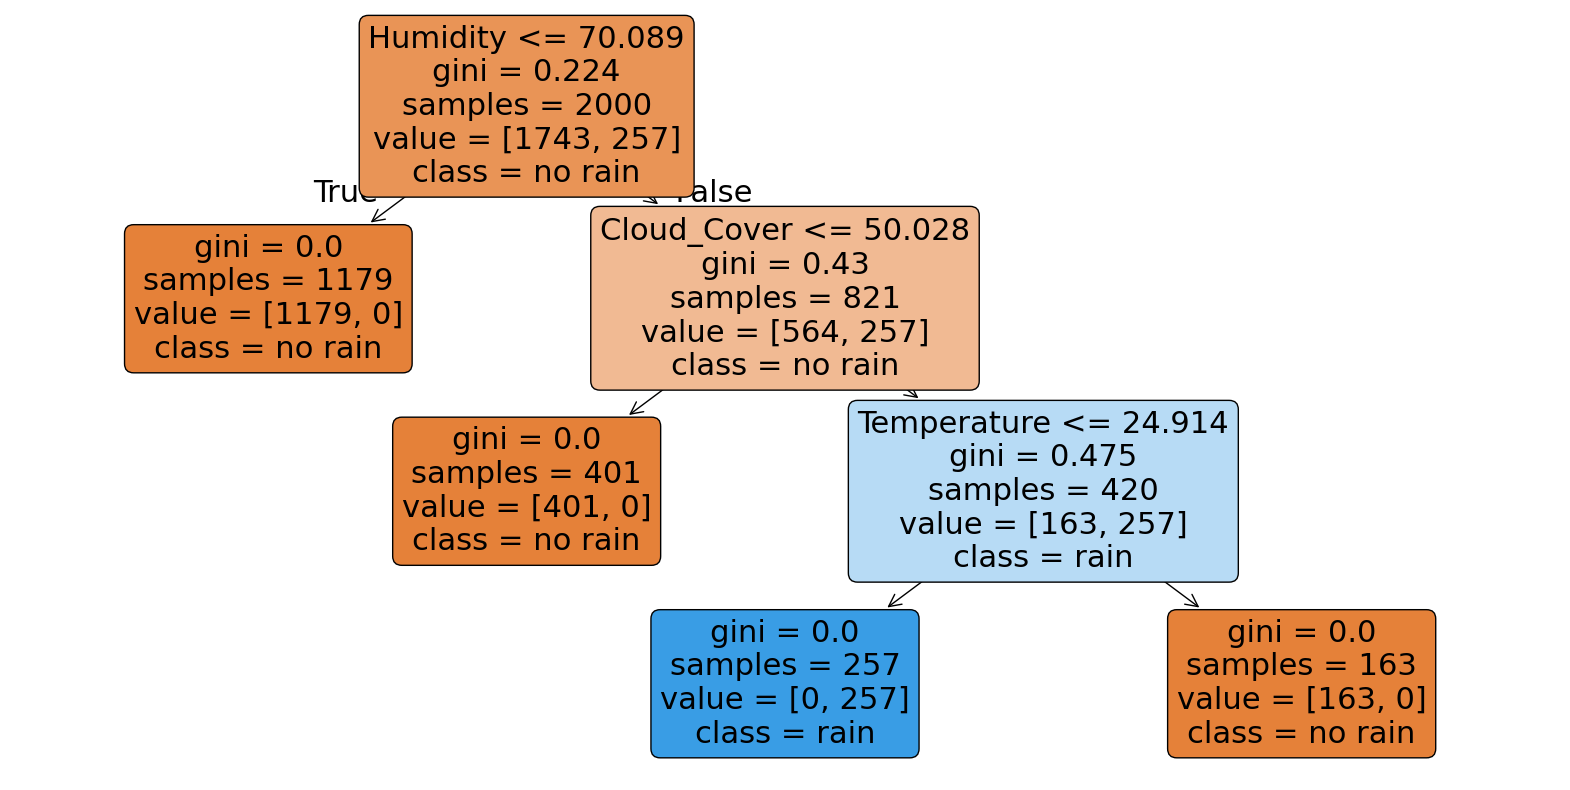

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
file_path = 'weather_forecast_data.csv'
data = pd.read_csv(file_path)
label_encoder = LabelEncoder()
data['Rain'] = label_encoder.fit_transform(data['Rain'])
X = data.drop('Rain', axis=1)
y = data['Rain']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.show()


Accuracy: 1.00


<Figure size 800x600 with 0 Axes>

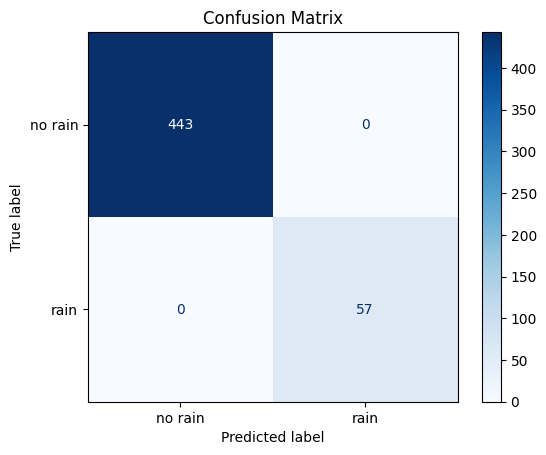

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


Accuracy without pruning: 1.00
Accuracy with max_depth=3: 1.00
Accuracy with min_samples_split=10: 1.00


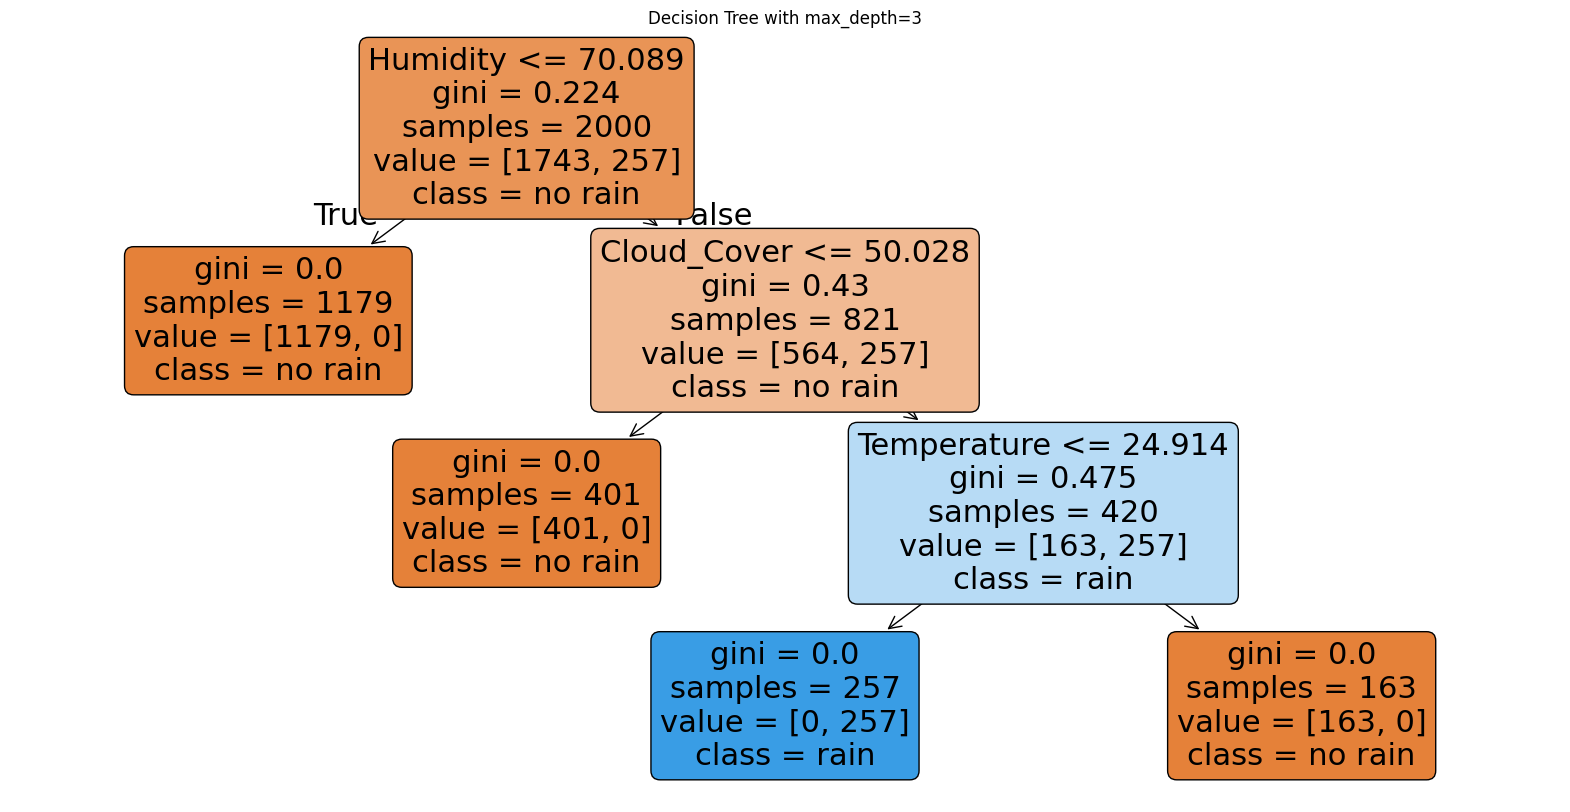

In [9]:
def evaluate_model_with_pruning(max_depth=None, min_samples_split=2):
    pruned_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    pruned_classifier.fit(X_train, y_train)
    y_pred = pruned_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, pruned_classifier
default_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))
pruned_depth_accuracy, pruned_depth_classifier = evaluate_model_with_pruning(max_depth=3)
pruned_split_accuracy, pruned_split_classifier = evaluate_model_with_pruning(min_samples_split=10)
print(f"Accuracy without pruning: {default_accuracy:.2f}")
print(f"Accuracy with max_depth=3: {pruned_depth_accuracy:.2f}")
print(f"Accuracy with min_samples_split=10: {pruned_split_accuracy:.2f}")
plt.figure(figsize=(20, 10))
plot_tree(pruned_depth_classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree with max_depth=3")
plt.show()


Feature Importances:
       Feature  Importance
0  Temperature    0.445319
3  Cloud_Cover    0.342940
1     Humidity    0.211742
2   Wind_Speed    0.000000
4     Pressure    0.000000


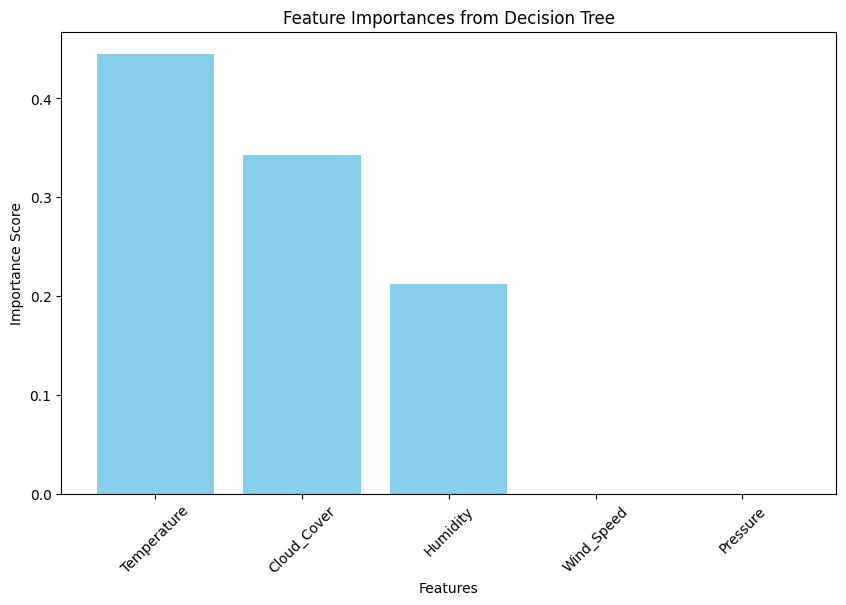

In [11]:
feature_importances = dt_classifier.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()


Decision Tree Model Performance:
Accuracy without pruning: 1.00
Accuracy with max_depth=3: 1.00
Accuracy with min_samples_split=10: 1.00


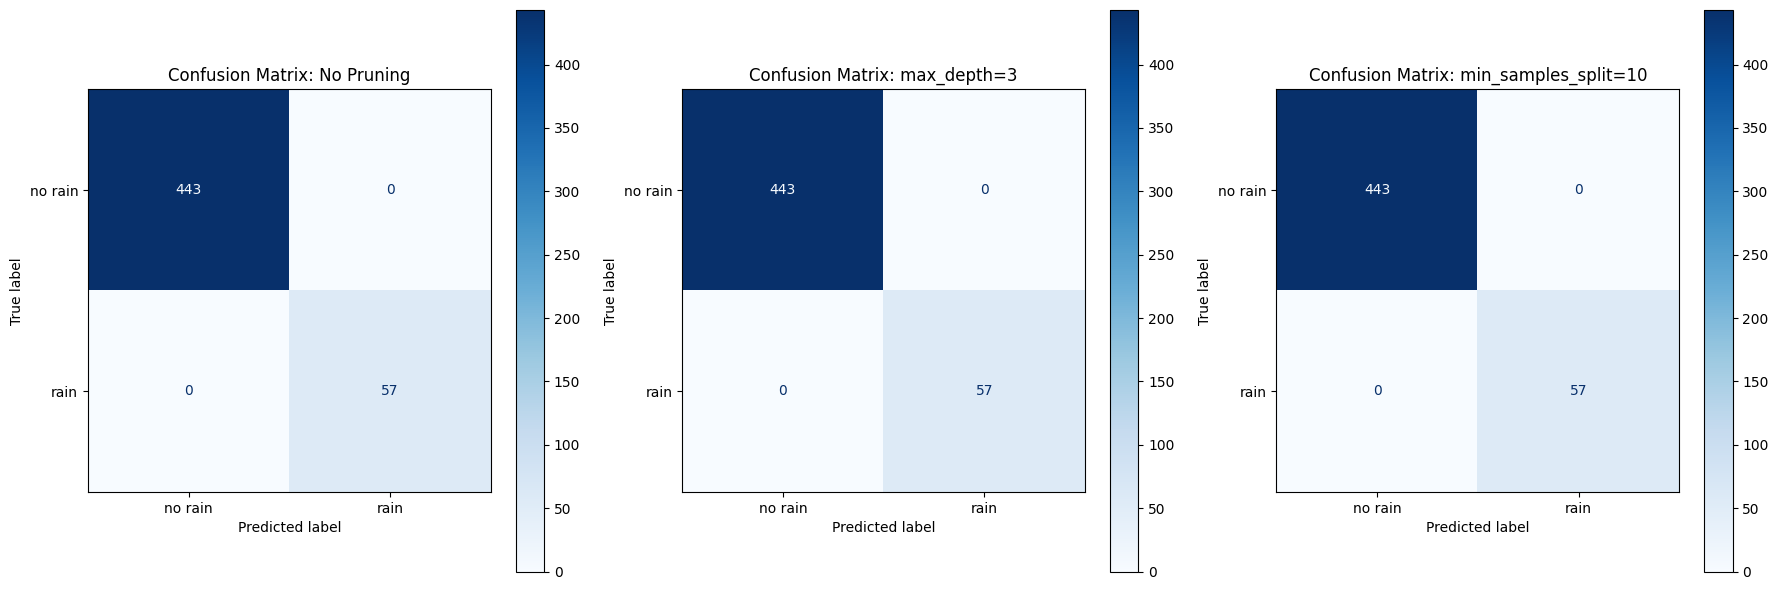

In [12]:
default_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))
pruned_depth_accuracy, pruned_depth_classifier = evaluate_model_with_pruning(max_depth=3)
pruned_split_accuracy, pruned_split_classifier = evaluate_model_with_pruning(min_samples_split=10)
print("Decision Tree Model Performance:")
print(f"Accuracy without pruning: {default_accuracy:.2f}")
print(f"Accuracy with max_depth=3: {pruned_depth_accuracy:.2f}")
print(f"Accuracy with min_samples_split=10: {pruned_split_accuracy:.2f}")
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
cm_default = confusion_matrix(y_test, dt_classifier.predict(X_test))
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=label_encoder.classes_)
disp_default.plot(cmap="Blues", values_format="d", ax=plt.gca())
plt.title("Confusion Matrix: No Pruning")
plt.subplot(1, 3, 2)
cm_pruned_depth = confusion_matrix(y_test, pruned_depth_classifier.predict(X_test))
disp_pruned_depth = ConfusionMatrixDisplay(confusion_matrix=cm_pruned_depth, display_labels=label_encoder.classes_)
disp_pruned_depth.plot(cmap="Blues", values_format="d", ax=plt.gca())
plt.title("Confusion Matrix: max_depth=3")
plt.subplot(1, 3, 3)
cm_pruned_split = confusion_matrix(y_test, pruned_split_classifier.predict(X_test))
disp_pruned_split = ConfusionMatrixDisplay(confusion_matrix=cm_pruned_split, display_labels=label_encoder.classes_)
disp_pruned_split.plot(cmap="Blues", values_format="d", ax=plt.gca())
plt.title("Confusion Matrix: min_samples_split=10")

plt.tight_layout()
plt.show()
